In [1]:
pip install ultralytics==8.0.196

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NeUcbEYPGJaE0zODAtW4")
project = rf.workspace("praneel-duwi6").project("watch-detection-sliqc")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Watch-detection-1 in yolov8:: 100%|██████████| 2474/2474 [00:00<00:00, 4389.94it/s]


In [3]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('yolov8s.pt')

# Train the model
model.train(
    data='/content/Watch-detection-1/data.yaml',  # Path to your dataset configuration file
    epochs=50,                    # Number of training epochs
    imgsz=640,                    # Image size
    batch=16,                     # Batch size
    plots=True                    # Generate training plots
)

100%|██████████| 21.5M/21.5M [00:00<00:00, 140MB/s]
New https://pypi.org/project/ultralytics/8.2.81 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Watch-detection-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buff

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d2b381e7370>
fitness: 0.7227231519556767
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.70418])
names: {0: 'Watch'}
plot: True
results_dict: {'metrics/precision(B)': 0.9002986596885982, 'metrics/recall(B)': 0.8054950234986977, 'metrics/mAP50(B)': 0.8896027049187956, 'metrics/mAP50-95(B)': 0.704180979404219, 'fitness': 0.7227231519556767}
save_dir: PosixPath('runs/detect/train')
speed: {'preprocess': 0.4859909415245056, 'inference': 3.821474313735962, 'loss': 0.0010728836059570312, 'postprocess': 6.148643791675568}

In [4]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image



image 1/1 /content/Screenshot 2024-08-24 at 4.32.31 PM.png: 640x640 1 Watch, 16.4ms
Speed: 8.5ms preprocess, 16.4ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


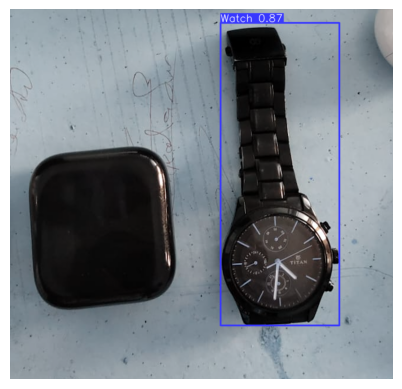

In [5]:
results = model('/content/Screenshot 2024-08-24 at 4.32.31 PM.png')  # Replace with your image path

# Plot the results with bounding boxes
results[0].plot()  # Plot the first (and only) result

# Display the image using matplotlib
plt.imshow(results[0].plot())
plt.axis('off')  # Hide axes
plt.show()


image 1/1 /content/Screenshot 2024-08-24 at 4.32.31 PM.png: 640x640 1 Watch, 16.5ms
Speed: 12.2ms preprocess, 16.5ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)


Object: Watch, Width of Box: 2.37 inches, Height of Box: 6.03 inches


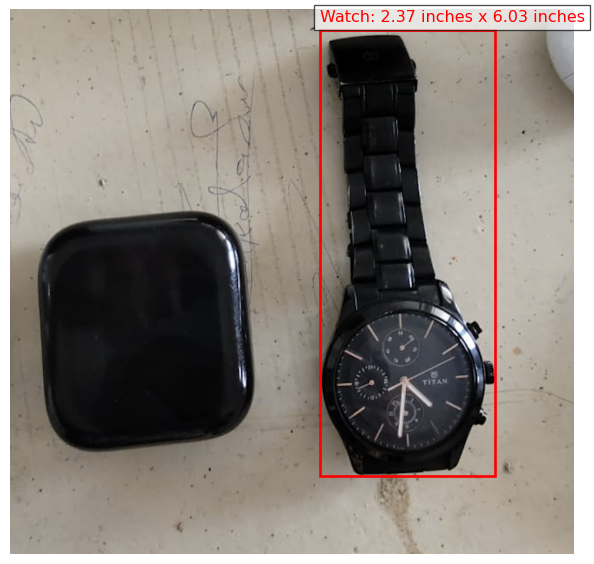

In [6]:
def detect_and_measure(image_file, dpi=96):
    # Run inference
    detection_results = model(image_file, imgsz=640, conf=0.5)

    # Extract bounding box dimensions and labels
    bounding_boxes = detection_results[0].boxes.xywh.cpu().numpy()  # Bounding boxes in xywh format
    class_labels = detection_results[0].names  # Class labels
    class_ids = detection_results[0].boxes.cls.cpu().numpy().astype(int)  # Class IDs

    # Load image
    img = cv2.imread(image_file)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Resize image if too large
    max_dimension = 2000
    img_height, img_width, _ = img_rgb.shape
    if max(img_height, img_width) > max_dimension:
        scale_factor = max_dimension / max(img_height, img_width)
        new_width = int(img_width * scale_factor)
        new_height = int(img_height * scale_factor)
        img_rgb = cv2.resize(img_rgb, (new_width, new_height))

    # Convert to PIL format for matplotlib
    img_pil = Image.fromarray(img_rgb)

    # Display the image with bounding boxes
    plt.figure(figsize=(img_pil.width / dpi, img_pil.height / dpi), dpi=dpi)
    plt.imshow(img_pil)
    ax = plt.gca()

    for box, class_id in zip(bounding_boxes, class_ids):
        x_center, y_center, box_width, box_height = box
        x1, y1 = int(x_center - box_width / 2), int(y_center - box_height / 2)
        x2, y2 = int(x_center + box_width / 2), int(y_center + box_height / 2)

        # Draw bounding box
        rect = plt.Rectangle((x1, y1), box_width, box_height, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)

        # Convert dimensions from pixels to inches
        width_in_inches = box_width / dpi
        height_in_inches = box_height / dpi

        # Get the label of the detected object
        object_label = class_labels[class_id]

        # Print dimensions and label
        print(f"Object: {object_label}, Width of Box: {width_in_inches:.2f} inches, Height of Box: {height_in_inches:.2f} inches")

        # Annotate image with dimensions and label
        plt.text(x1, y1 - 10, f'{object_label}: {width_in_inches:.2f} inches x {height_in_inches:.2f} inches',
                 color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

    plt.axis('off')
    plt.show()

# Example usage
image_file = '/content/Screenshot 2024-08-24 at 4.32.31 PM.png'
detect_and_measure(image_file)

In [7]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>